In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import random
import numpy as np
import random
from tensorflow.python.framework import ops
ops.reset_default_graph()

<tf.Tensor 'Const:0' shape=(2,) dtype=int32>

# 数据准备

In [6]:
batch_size = 50
symmetry = ['rotate180', 'rotate90', 'rotate270', 'flip_v', 'flip_h']

In [7]:
def print_board(board):
    symbols = ['O',' ','X']
    board_plus1 = [int(x) + 1 for x in board]
    print(' ' + symbols[board_plus1[0]] + ' | ' + symbols[board_plus1[1]] + ' | ' + symbols[board_plus1[2]])
    print('___________')
    print(' ' + symbols[board_plus1[3]] + ' | ' + symbols[board_plus1[4]] + ' | ' + symbols[board_plus1[5]])
    print('___________')
    print(' ' + symbols[board_plus1[6]] + ' | ' + symbols[board_plus1[7]] + ' | ' + symbols[board_plus1[8]])

In [8]:
def get_symmetry(board, response, transformation):
    '''
    :param board: list of integers 9 long:
     opposing mark = -1
     friendly mark = 1
     empty space = 0
    :param transformation: one of five transformations on a board:
     'rotate180', 'rotate90', 'rotate270', 'flip_v', 'flip_h'
    :return: tuple: (new_board, new_response)
    '''
    if transformation == 'rotate180':
        new_response = 8 - response
        return(board[::-1], new_response)
    elif transformation == 'rotate90':
        new_response = [6, 3, 0, 7, 4, 1, 8, 5, 2].index(response)
        tuple_board = list(zip(*[board[6:9], board[3:6], board[0:3]]))
        return([value for item in tuple_board for value in item], new_response)
    elif transformation == 'rotate270':
        new_response = [2, 5, 8, 1, 4, 7, 0, 3, 6].index(response)
        tuple_board = list(zip(*[board[0:3], board[3:6], board[6:9]]))[::-1]
        return([value for item in tuple_board for value in item], new_response)
    elif transformation == 'flip_v':
        new_response = [6, 7, 8, 3, 4, 5, 0, 1, 2].index(response)
        return(board[6:9] +  board[3:6] + board[0:3], new_response)
    elif transformation == 'flip_h':  # flip_h = rotate180, then flip_v
        new_response = [2, 1, 0, 5, 4, 3, 8, 7, 6].index(response)
        new_board = board[::-1]
        return(new_board[6:9] +  new_board[3:6] + new_board[0:3], new_response)
    else:
        raise ValueError('Method not implmented.')

In [9]:
def get_moves_from_csv(csv_file):
    '''
    :param csv_file: csv file location containing the boards w/ responses
    :return: moves: list of moves with index of best response
    '''
    moves = []
    with open(csv_file, 'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            moves.append(([int(x) for x in row[0:9]],int(row[9])))
    return(moves)

In [10]:
def get_rand_move(moves, rand_transforms=2):
    '''
    :param moves: list of the boards w/responses
    :param rand_transforms: how many random transforms performed on each
    :return: (board, response), board is a list of 9 integers, response is 1 int
    '''
    (board, response) = random.choice(moves)
    possible_transforms = ['rotate90', 'rotate180', 'rotate270', 'flip_v', 'flip_h']
    for i in range(rand_transforms):
        random_transform = random.choice(possible_transforms)
        (board, response) = get_symmetry(board, response, random_transform)
    return(board, response)

In [15]:
sess = tf.Session()
moves = get_moves_from_csv('base_tic_tac_toe_moves.csv')
train_length = 500
train_set = []
for t in range(train_length):
    train_set.append(get_rand_move(moves))

print(train_set)

[([1, -1, 0, -1, 0, 0, 0, 1, -1], 5), ([-1, -1, 1, 0, -1, 0, 0, 1, 0], 8), ([1, 0, -1, -1, -1, 0, 1, 0, 0], 8), ([-1, 0, 0, 0, -1, 0, 1, 0, 0], 8), ([0, 0, -1, -1, 0, 1, 1, -1, 0], 1), ([1, 0, -1, -1, -1, 0, 1, 0, 0], 5), ([1, 0, -1, -1, -1, 1, 0, 0, 0], 6), ([0, -1, 1, 0, -1, 0, -1, 1, 0], 8), ([0, 1, 0, 0, -1, -1, 1, -1, 0], 3), ([-1, 0, 0, 0, -1, 0, 0, 0, 1], 6), ([0, 0, 0, 1, -1, -1, -1, 0, 1], 2), ([0, 0, 0, -1, 0, 0, 0, -1, 1], 2), ([0, 0, -1, 0, 1, 0, -1, 0, 0], 1), ([-1, 0, 0, 1, -1, -1, 1, 0, 0], 8), ([0, 0, 0, -1, -1, 0, 0, 0, 1], 5), ([-1, 0, 1, 0, -1, -1, 0, 0, 1], 3), ([0, 0, 0, 0, -1, 0, 1, -1, 0], 1), ([1, 0, 0, 0, -1, 0, -1, 0, 0], 2), ([0, 0, -1, 1, -1, -1, 0, 0, 1], 6), ([0, 0, -1, 0, 0, 0, 1, -1, 0], 4), ([-1, 0, 0, -1, 0, 1, 1, -1, 0], 2), ([-1, 0, 0, 0, 0, -1, 0, 0, 1], 4), ([0, 0, -1, -1, -1, 1, 0, 0, 1], 6), ([1, -1, 0, -1, 0, 0, 0, 1, -1], 5), ([-1, 0, 0, 0, 0, -1, 0, 0, 1], 4), ([0, 0, 1, 0, -1, -1, -1, 0, 1], 3), ([0, 0, 0, 0, -1, 0, 0, 0, 0], 6), ([0, -1, 1, 

In [12]:
test_board = [-1, 0, 0, 1, -1, -1, 0, 0, 1]
train_set = [x for x in train_set if x[0] != test_board]

In [13]:
def init_weights(shape):
    return(tf.Variable(tf.random_normal(shape)))


def model(X, A1, A2, bias1, bias2):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X, A1), bias1))
    layer2 = tf.add(tf.matmul(layer1, A2), bias2)
    return(layer2)

In [14]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 9])
Y = tf.placeholder(dtype=tf.int32, shape=[None])

A1 = init_weights([9, 81])
bias1 = init_weights([81])
A2 = init_weights([81, 9])
bias2 = init_weights([9])

model_output = model(X, A1, A2, bias1, bias2)

print(model_output)

Tensor("Add_1:0", shape=(?, 9), dtype=float32)


# 模型构建

In [11]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model_output, labels=Y))
train_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)
prediction = tf.argmax(model_output, 1)

In [12]:
init = tf.global_variables_initializer()
sess.run(init)
loss_vec = []
for i in range(10000):
    rand_indices = np.random.choice(range(len(train_set)), batch_size, replace=False)
    batch_data = [train_set[i] for i in rand_indices]
    x_input = [x[0] for x in batch_data]
    y_target = np.array([y[1] for y in batch_data])
    sess.run(train_step, feed_dict={X: x_input, Y: y_target})

    temp_loss = sess.run(loss, feed_dict={X: x_input, Y: y_target})
    loss_vec.append(temp_loss)
    if i%500==0:
        print('iteration ' + str(i) + ' Loss: ' + str(temp_loss))

iteration 0 Loss: 8.60515
iteration 500 Loss: 1.88184
iteration 1000 Loss: 1.63089
iteration 1500 Loss: 1.23882
iteration 2000 Loss: 1.20562
iteration 2500 Loss: 1.4494
iteration 3000 Loss: 1.19227
iteration 3500 Loss: 0.892312
iteration 4000 Loss: 0.998839
iteration 4500 Loss: 1.1717
iteration 5000 Loss: 1.03103
iteration 5500 Loss: 1.07898
iteration 6000 Loss: 1.02718
iteration 6500 Loss: 0.817845
iteration 7000 Loss: 0.993813
iteration 7500 Loss: 0.745871
iteration 8000 Loss: 0.848545
iteration 8500 Loss: 0.836112
iteration 9000 Loss: 0.923733
iteration 9500 Loss: 0.757212


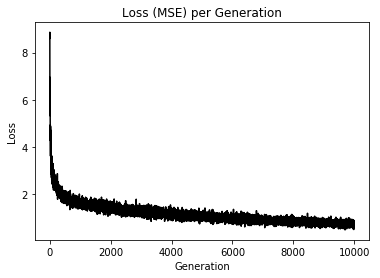

In [13]:
plt.plot(loss_vec, 'k-', label='Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

In [14]:
test_boards = [test_board]
feed_dict = {X: test_boards}
logits = sess.run(model_output, feed_dict=feed_dict)
predictions = sess.run(prediction, feed_dict=feed_dict)
print(predictions)

[6]


In [15]:
def check(board):
    wins = [[0,1,2], [3,4,5], [6,7,8], [0,3,6], [1,4,7], [2,5,8], [0,4,8], [2,4,6]]
    for i in range(len(wins)):
        if board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]==1.:
            return(1)
        elif board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]==-1.:
            return(1)
    return(0)

In [16]:
game_tracker = [0., 0., 0., 0., 0., 0., 0., 0., 0.]
win_logical = False
num_moves = 0
while not win_logical:
    player_index = input('Input index of your move (0-8): ')
    num_moves += 1
    game_tracker[int(player_index)] = 1.
    [potential_moves] = sess.run(model_output, feed_dict={X: [game_tracker]})
    allowed_moves = [ix for ix,x in enumerate(game_tracker) if x==0.0]
    model_move = np.argmax([x if ix in allowed_moves else -999.0 for ix,x in enumerate(potential_moves)])
    game_tracker[int(model_move)] = -1.
    print('Model has moved')
    print_board(game_tracker)
    if check(game_tracker)==1 or num_moves>=5:
        print('Game Over!')
        win_logical = True

Input index of your move (0-8): 0
Model has moved
 X |   |  
___________
   |   |  
___________
 O |   |  
Input index of your move (0-8): 2
Model has moved
 X | O | X
___________
   |   |  
___________
 O |   |  
Input index of your move (0-8): 8
Model has moved
 X | O | X
___________
   |   |  
___________
 O | O | X
Input index of your move (0-8): 4
Model has moved
 X | O | X
___________
 O | X |  
___________
 O | O | X
Game Over!
